Business Need: The marketing team needs to know which customers are most likely to convert, how to target them, and what strategies can improve their spending.

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [101]:
df = pd.read_csv("Data/Mall_Customers.csv")

In [102]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [103]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [104]:
df = df.drop('CustomerID',axis=1)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [106]:
df.shape

(200, 4)

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


## Univariate Analysis

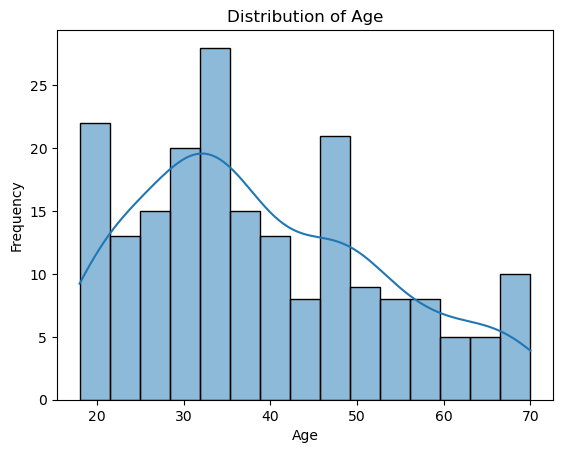

In [108]:
sns.histplot(df['Age'],bins=15,kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

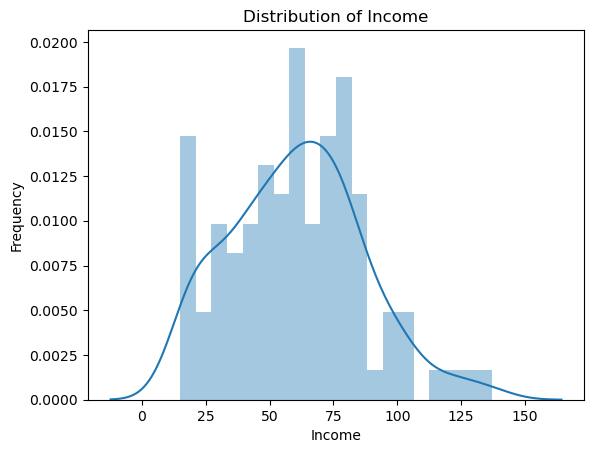

In [109]:
sns.distplot(df['Annual Income (k$)'],bins=20,kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

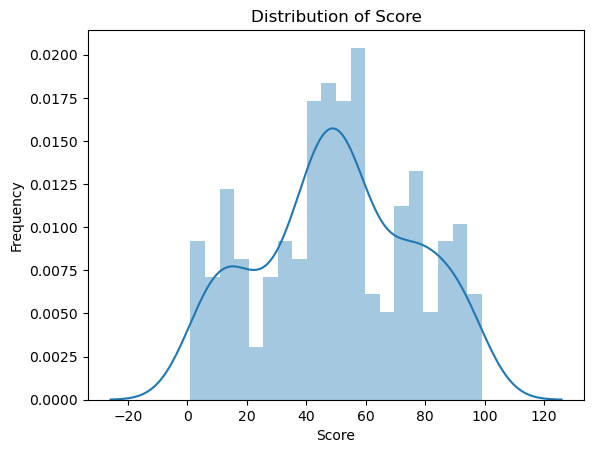

In [110]:
sns.distplot(df['Spending Score (1-100)'],bins=20,kde=True)
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

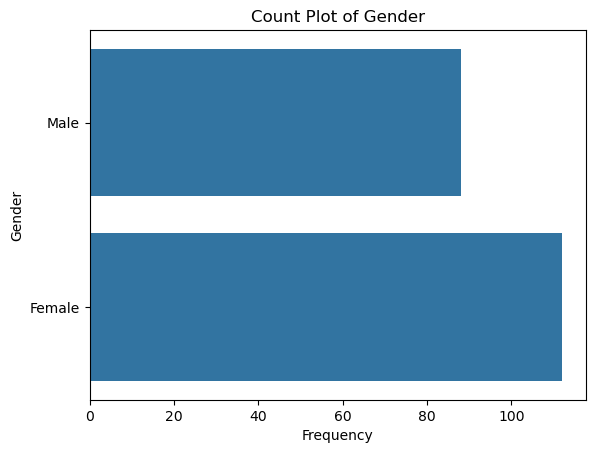

In [111]:
sns.countplot(df['Gender'])
plt.title('Count Plot of Gender')
plt.ylabel('Gender')
plt.xlabel('Frequency')
plt.show()

## Bivariate & multivariate Analysis

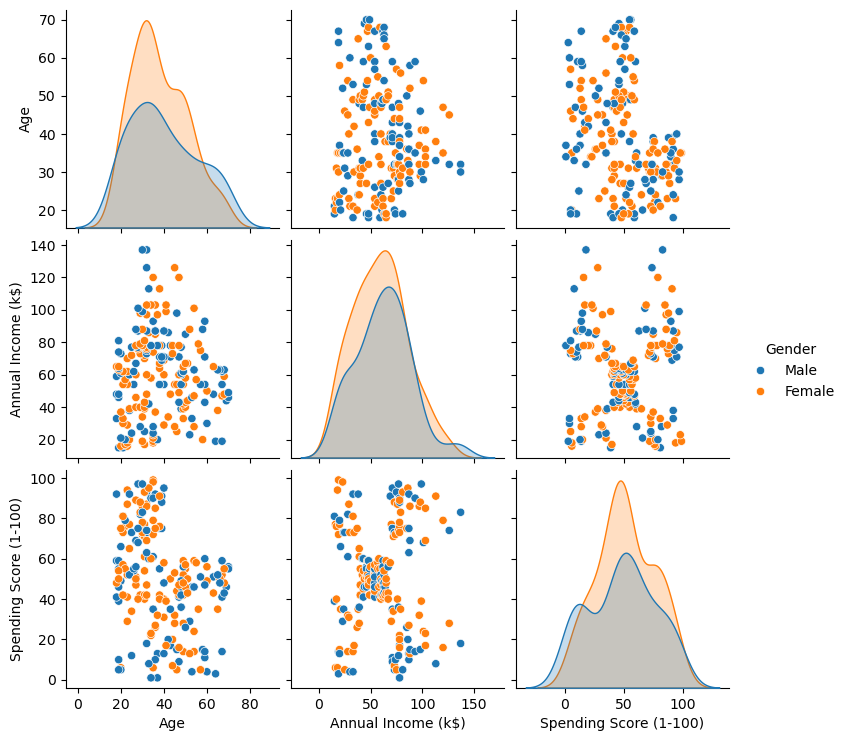

In [112]:
# Looking athow gender, age, income, and spending score are distributed
# Visualize the relationship betweem varaibles
sns.pairplot(df, hue='Gender')
plt.show()

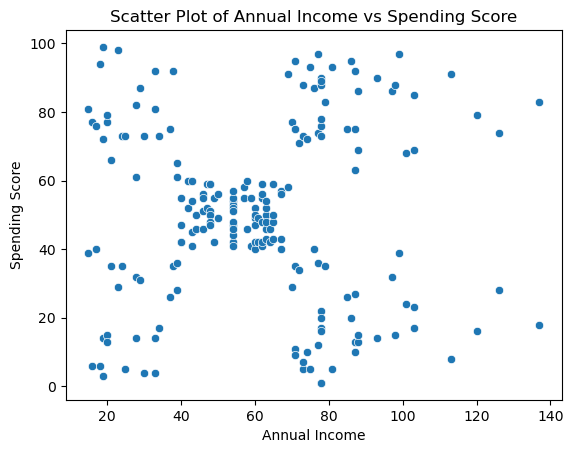

In [113]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

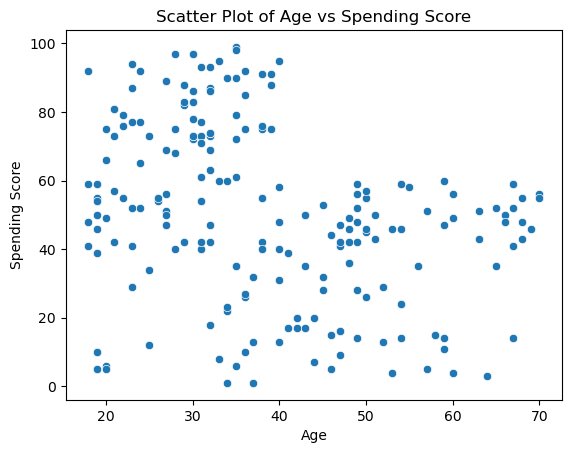

In [114]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Scatter Plot of Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

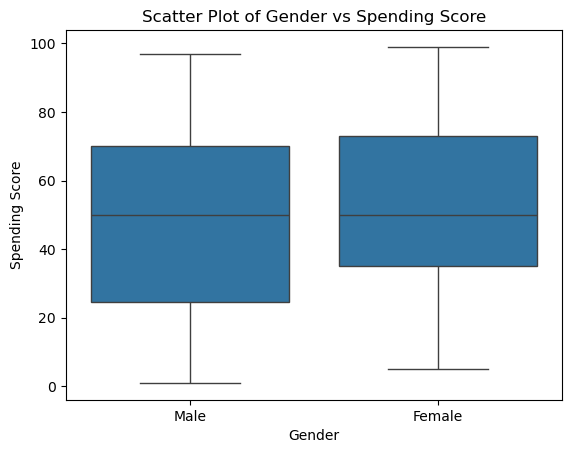

In [115]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Scatter Plot of Gender vs Spending Score')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

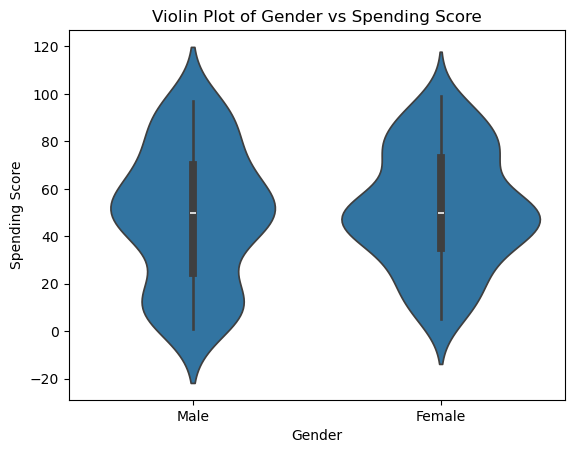

In [116]:
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df )
plt.title('Violin Plot of Gender vs Spending Score')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

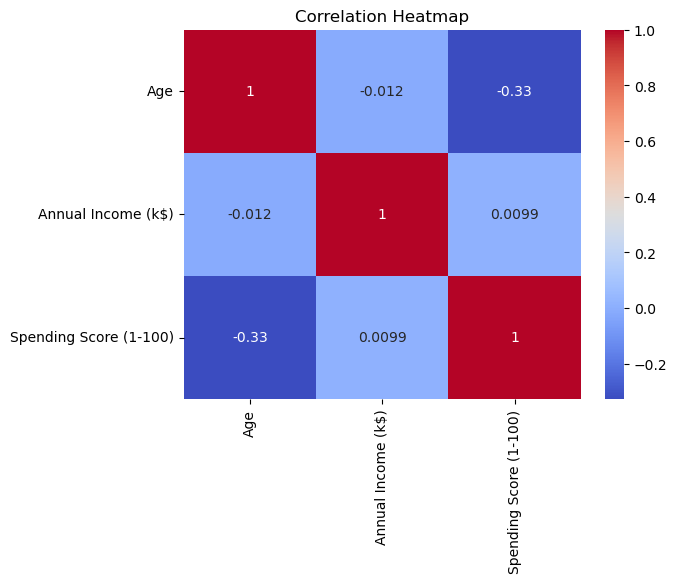

In [117]:
correlation_matrix = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

In [118]:
# Income to spending ration
df['Income to Spending Ratio'] = df['Annual Income (k$)'] / df['Spending Score (1-100)']
# Binned age group
df['Age Group'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 80], labels=['18-30', '31-45', '46-60', '61-80'])


## Data Preprocessing

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df[['Income', 'Score']] = scaled_df

In [120]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income to Spending Ratio,Age Group,Income,Score
0,Male,19,15,39,0.384615,18-30,-1.738999,-0.434801
1,Male,21,15,81,0.185185,18-30,-1.738999,1.195704
2,Female,20,16,6,2.666667,18-30,-1.700830,-1.715913
3,Female,23,16,77,0.207792,18-30,-1.700830,1.040418
4,Female,31,17,40,0.425000,31-45,-1.662660,-0.395980


In [121]:
scaled_df

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Elbow Method to Determine optimal K

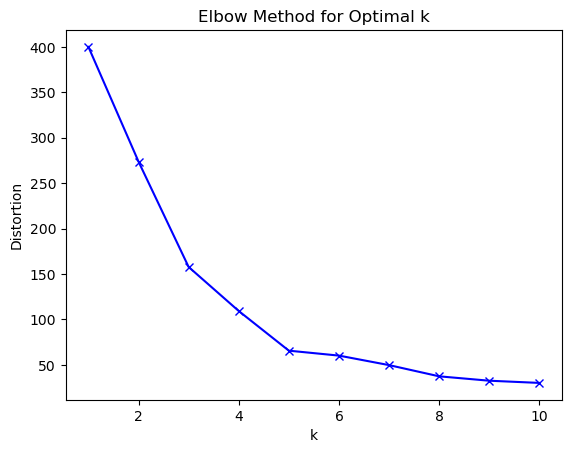

In [122]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    distortions.append(kmeans.inertia_)

# Elbow method plot
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()


## Elbow Method

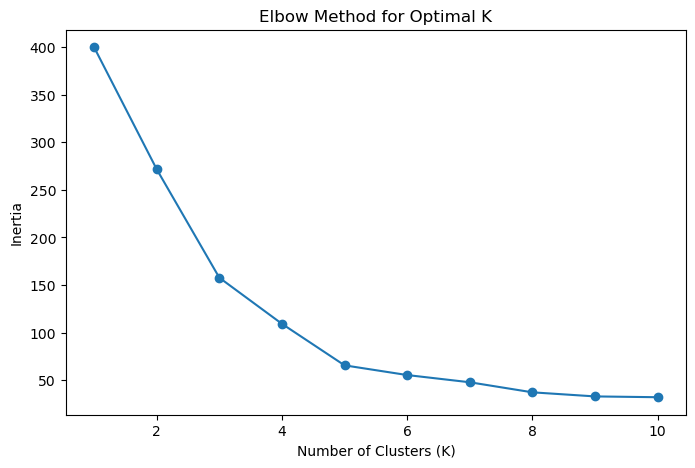

In [123]:
# old


from sklearn.cluster import KMeans
#data = df[['Annual Income (k$)','Spending Score (1-100)']].values
inertia_values = []

for K in range(1,11):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1,11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [124]:
# running kmeans with selected no.of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)
# Objective: Grouping customers into distinct clusters based on spending behavior and income.


In [125]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income to Spending Ratio,Age Group,Income,Score,Cluster
0,Male,19,15,39,0.384615,18-30,-1.738999,-0.434801,4
1,Male,21,15,81,0.185185,18-30,-1.738999,1.195704,2
2,Female,20,16,6,2.666667,18-30,-1.700830,-1.715913,4
3,Female,23,16,77,0.207792,18-30,-1.700830,1.040418,2
4,Female,31,17,40,0.425000,31-45,-1.662660,-0.395980,4


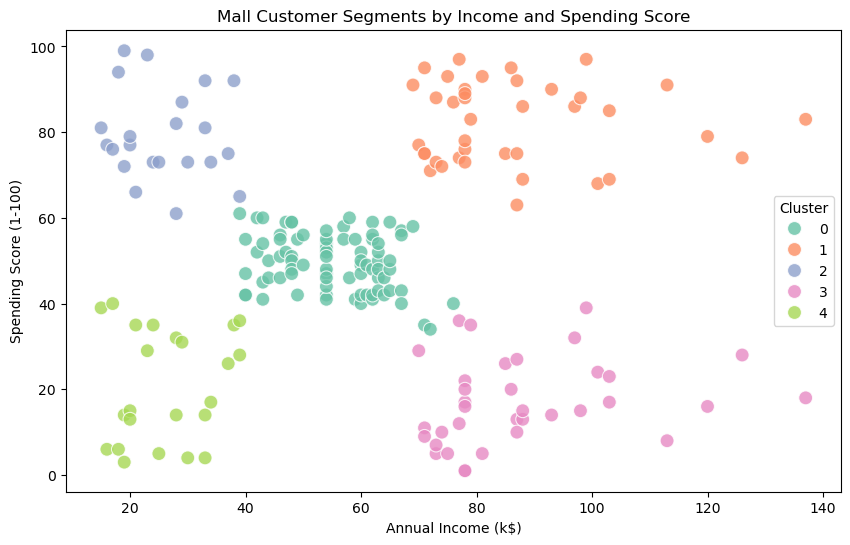

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2', s=100, alpha=0.8)
plt.title('Mall Customer Segments by Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


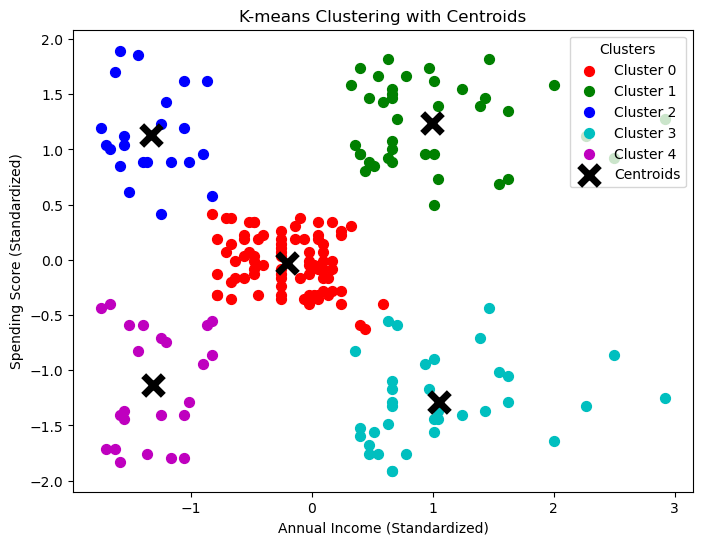

In [127]:

K = 5

# Initialize and fit K-means
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(scaled_df)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Define colors for the clusters
colors = ['r', 'g', 'b', 'c', 'm']

# Plot the clusters
plt.figure(figsize=(8, 6))

for i in range(K):  # Plot each cluster separately with a unique color
    cluster_points = scaled_df[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, color=colors[i], label=f'Cluster {i}')

# Plotting centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=5, color='black', label='Centroids')

# Adding labels and title
plt.title('K-means Clustering with Centroids')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')

# Adding the legend
plt.legend(title="Clusters", loc='upper right')

# Show the plot
plt.show()


* cluster 0 : mid income & mid spending
* cluster 1 : high income & high spending
* cluster 2 : low income & high spending
* cluster 3 : high income & low spending
* cluster 4 : low income & low spending

In [128]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income to Spending Ratio,Age Group,Income,Score,Cluster
0,Male,19,15,39,0.384615,18-30,-1.738999,-0.434801,4
1,Male,21,15,81,0.185185,18-30,-1.738999,1.195704,2
2,Female,20,16,6,2.666667,18-30,-1.700830,-1.715913,4
3,Female,23,16,77,0.207792,18-30,-1.700830,1.040418,2
4,Female,31,17,40,0.425000,31-45,-1.662660,-0.395980,4


### Cluster profiling

In [129]:
cluster_summary = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'median'],
    'Spending Score (1-100)': ['mean', 'median'],
    'Age': ['mean', 'median']
}).reset_index()

cluster_summary.head()


Cluster Annual Income (k$)        Spending Score (1-100)               Age  \
                        mean median                   mean median       mean   
0       0          55.296296   54.0              49.518519   50.0  42.716049   
1       1          86.538462   79.0              82.128205   83.0  32.692308   
2       2          25.727273   24.5              79.363636   77.0  25.272727   
3       3          88.200000   85.0              17.114286   16.0  41.114286   
4       4          26.304348   25.0              20.913043   17.0  45.217391   

          
  median  
0   46.0  
1   32.0  
2   23.5  
3   42.0  
4   46.0

### Business Insights
* Cluster 1: High-income, high-spending—likely affluent customers who may respond to exclusive offers.
* Cluster 2: Low-income, high-spending—focus on loyalty programs to maintain their high engagement.
* Cluster 3: High-income, low-spending—consider upselling or personalized recommendations to increase their spending.

In [130]:
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
score = silhouette_score(scaled_df,labels)
print(f"Silhouette Score : {score}")

Silhouette Score : 0.5546571631111091


## predictive Analytics

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



# Features for prediction
X = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]  # Add other features if needed

# Target: Cluster label
y = df['Cluster']

# Scale the features
scaler = StandardScaler()
X[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']] = scaler.fit_transform(X[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])

# Save the scaler
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)



# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a RandomForestClassifier (you can also try other models like LogisticRegression, XGBoost, etc.)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the clusters on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       0.91      0.91      0.91        11
           4       1.00      1.00      1.00         3

    accuracy                           0.95        40
   macro avg       0.97      0.97      0.97        40
weighted avg       0.95      0.95      0.95        40



#### Feature Importance Analysis

In [137]:
importances = clf.feature_importances_
feature_names = X.columns

for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


Annual Income (k$): 0.4348
Spending Score (1-100): 0.4158
Age: 0.1493


In [139]:

# Save the trained model 
    
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(clf , f)